In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from utils import sliding_average, savefig, plot_with_std, human_index, get_datetime_str, question_title_map

In [4]:
condition_2 = pd.read_csv("data/condition_2.csv")
condition_3 = pd.read_csv("data/condition_3.csv")
df = pd.concat([condition_2, condition_3])
df.head()

,participantId,ideology_all_zeros,idx_of_question,who_answers_first,bot_detection,ideology,ideology_distance,bot_ideology,answer,answer_distance,bot_answer,affection_competence,affection_warmth
0,009AFBEE6704466A96A1BDFDF031CACC,True,1,1,False,0.0,0.0,"[0.0, 0.0]",-3.0,3.000000,"[0.4498796804490537, -1.8641611397792965]",1,0
1,009AFBEE6704466A96A1BDFDF031CACC,True,2,2,False,0.0,0.0,[0.0],0.2,2.466667,[-2.2666666666666666],1,0
2,009AFBEE6704466A96A1BDFDF031CACC,True,5,1,False,0.0,0.0,"[0.0, 0.0]",-3.0,3.000000,"[-1.0465924247618945, -1.4467588524232047]",1,0
3,009AFBEE6704466A96A1BDFDF031CACC,True,0,0,False,0.0,0.0,[0.0],1.0,0.300000,[1.3],1,0
4,009AFBEE6704466A96A1BDFDF031CACC,True,4,0,False,0.0,0.0,[0.0],-1.0,3.200000,[2.2],1,0


In [5]:
df_grouped = df.set_index(['participantId', 'idx_of_question'])
df_sorted = df_grouped.sort_index(level=[0, 1])
df_sorted['ideology_group'] = df_sorted['ideology'].apply(lambda x: math.floor(min(x, 1.99))) + 2
df_human_first = df_sorted.loc[df_sorted['who_answers_first'] == human_index]

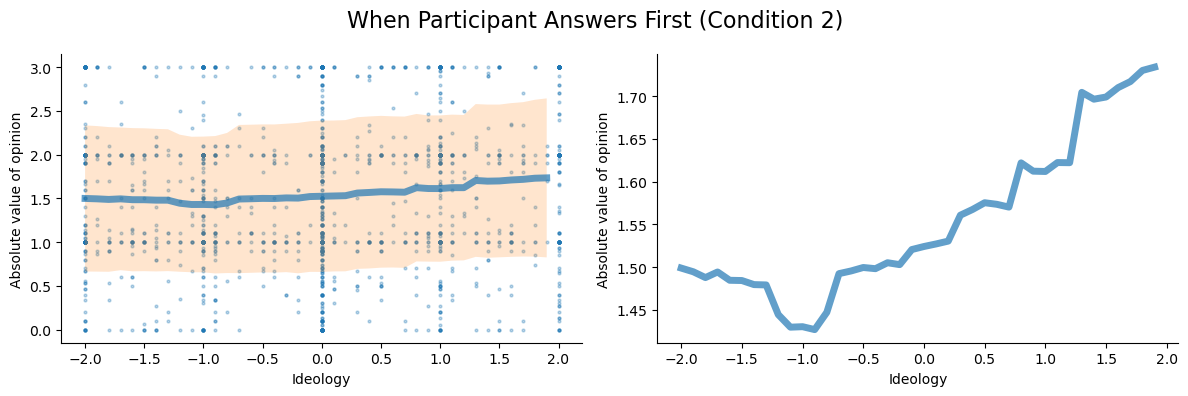

In [11]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
x = df_human_first['ideology']
y = np.abs(df_human_first['answer'])
average, low, high = sliding_average(x, y)

for i in range(2):
    ax = axes[i]
    if i == 0:
        ax.scatter(x, y, s=4, alpha=0.3)
        plot_with_std(ax, average, low, high)
    else:
        ax.plot(average.index, average.values, alpha=0.7, lw=5)
    ax.set(
        xlabel="Ideology",
        ylabel="Absolute value of opinion",
    ) 
fig.suptitle("When Participant Answers First (Condition 2)", fontsize=16)
savefig(fig, f"visualization/{get_datetime_str()}-ideology_opinion_abs.pdf")

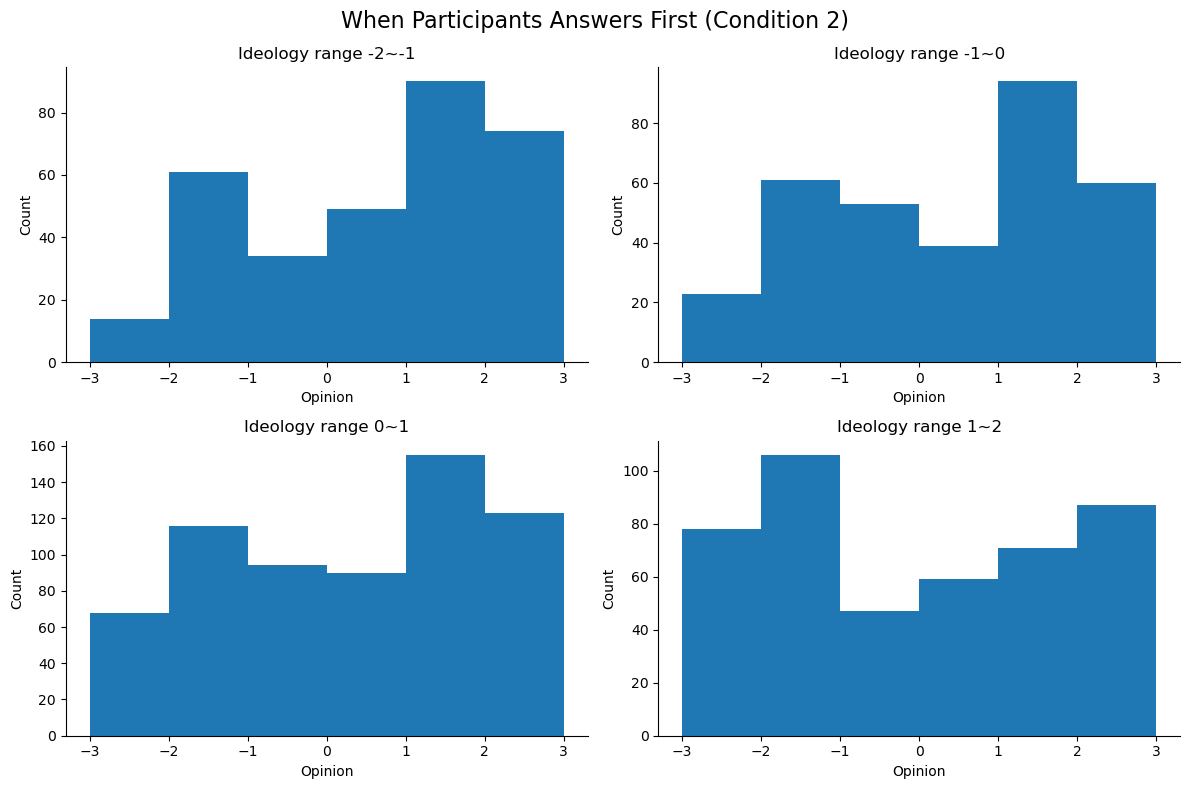

In [12]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)
for ideology_group in range(4):
    row = ideology_group // 2
    col = ideology_group % 2
    ax = axes[row][col]
    df_each_group = df_human_first.loc[df_human_first['ideology_group'] == ideology_group]
    ax.hist(df_each_group['answer'], bins=6)
    ax.set(
        xlabel="Opinion",
        ylabel="Count",
        title=f"Ideology range {ideology_group - 2}~{ideology_group - 1}"
    )
fig.suptitle("When Participants Answers First (Condition 2)", fontsize=16)
savefig(fig, f"visualization/{get_datetime_str()}-answer_histogram.pdf")